# Лабораторная работа №1
## Задания
1. Проверить зависимость активности от дня недели
2. Сравнить жанры двух городов в пн утром, пт вечер
3. Выяснить какие жанры самые прослушиваемые и зависят ли они от города

In [56]:
import pandas as pd
from matplotlib import pyplot as plt

music_reviews = pd.read_csv('/Users/denisovamaria/PyCharmData/lab1Data.csv')
display(music_reviews)
music_reviews.describe()

,userID,Track,artist,genre,City,time,Day
0,A0856B6E,Gamla Stan,NaN,electronic,Moscow,14:51:20,Monday
1,308FD753,My Match Your Fire,Before Their Eyes,posthardcore,Saint-Petersburg,08:45:14,Wednesday
2,96042B31,Real Girls Eat Cake,The Janoskians,pop,Moscow,08:55:34,Friday
3,CF287AE8,Montrose Ave,Y.V.E. 48,dance,Saint-Petersburg,08:26:19,Wednesday
4,6EB9A2E7,Chingalinga,Alyxx Dione,rnb,Moscow,21:16:56,Wednesday
...,...,...,...,...,...,...,...
65074,796F1578,Dare,Mikayla,pop,Saint-Petersburg,21:55:01,Wednesday
65075,F888E944,Bite It You Scum,Double Fucking Experience,alternative,Moscow,21:12:17,Monday
65076,9E2C9E74,Hyph Mngo,Joy Orbison,dubstep,Saint-Petersburg,14:47:26,Friday
65077,BD9790F6,Dreamer,Lo Mejor del Rock del nuevo Milenio,rock,Moscow,08:15:27,Friday


,userID,Track,artist,genre,City,time,Day
count,65079,63736,57512,63881,65079,65079,65079
unique,41748,39666,37806,268,2,20392,3
top,A8AE9169,Brand,Kartvelli,pop,Moscow,21:51:22,Friday
freq,76,136,136,8850,45360,14,23149


In [57]:
music_reviews.rename(columns={"  City  ": "city"}, inplace=True)
music_reviews.rename(columns={"Genre": "genre"}, inplace=True)
music_reviews.rename(columns={"  userID": "user"}, inplace=True)
music_reviews.rename(columns={"Track": "track"}, inplace=True)
music_reviews.rename(columns={"Day": "day"}, inplace=True)

In [58]:
music_reviews.genre = music_reviews.genre.fillna("Unknown")
music_reviews.artist = music_reviews.artist.fillna("Unknown")
music_reviews.track = music_reviews.track.fillna("Unknown")
music_reviews.drop_duplicates(inplace=True)
music_reviews['time'] = pd.to_datetime(music_reviews['time'], format='%H:%M:%S').dt.time
music_reviews.describe()

,user,track,artist,genre,city,time,day
count,61253,61253,61253,61253,61253,61253,61253
unique,41748,39666,37807,269,2,20392,3
top,A8AE9169,Unknown,Unknown,pop,Moscow,08:14:07,Friday
freq,71,1266,7097,8323,42741,13,21840


## Задания 1 
#  Проверить зависимость активности от дня недели

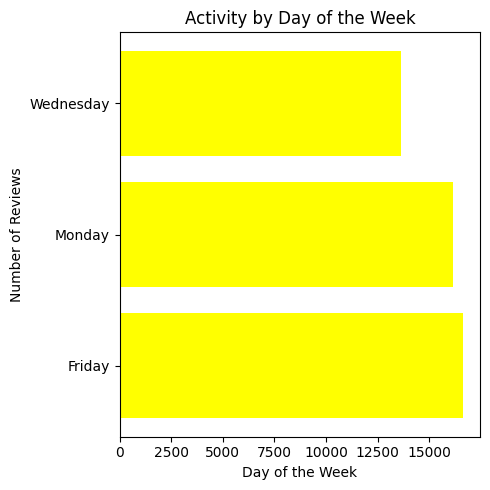

In [59]:
day_activity = music_reviews.groupby("day").user.nunique()
fig1 = plt.figure(figsize=(5, 5))
ax1 = fig1.add_subplot(111)
ax1.barh(day_activity.index, day_activity.values, color= 'yellow')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Reviews')
ax1.set_title('Activity by Day of the Week')
plt.tight_layout()
plt.show()

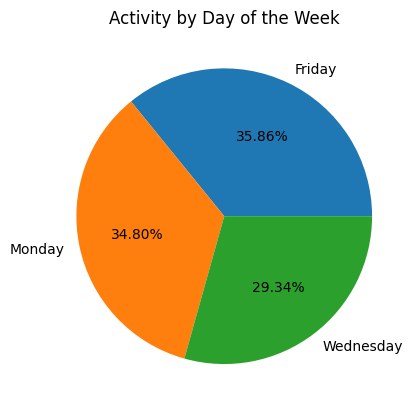

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(day_activity.values, labels=day_activity.index, autopct='%1.2f%%')
ax.set_title('Activity by Day of the Week')
plt.show()


## Задание 2
# Сравнить жанры двух городов в пн утром, пт вечер

In [61]:
morning_start = pd.to_datetime("06:00:00", format='%H:%M:%S').time()
morning_end = pd.to_datetime("12:00:00", format='%H:%M:%S').time()
evening_start = pd.to_datetime("16:00:00", format='%H:%M:%S').time()
evening_end = pd.to_datetime("21:00:00", format='%H:%M:%S').time()

In [62]:
moscow_data = music_reviews.loc[music_reviews.city == 'Moscow']
peter_data = music_reviews.loc[music_reviews.city == 'Saint-Petersburg']

In [63]:
music_evening_moscow = moscow_data.loc[
    (moscow_data['time'] >= evening_start) & (moscow_data['time'] <= evening_end) &
    (moscow_data['day'] == 'Friday')].groupby('genre').user.nunique()
music_evening_peter = peter_data.loc[
    (peter_data['time'] >= evening_start) & (peter_data['time'] <= evening_end) &
    (peter_data['day'] == 'Friday')].groupby('genre').user.nunique()
music_morning_moscow = moscow_data.loc[
    (moscow_data['time'] >= morning_start) & (moscow_data['time'] <= morning_end) &
    (moscow_data['day'] == 'Monday')].groupby('genre').user.nunique()
music_morning_peter = peter_data.loc[
    (peter_data['time'] >= morning_start) & (peter_data['time'] <= morning_end) &
    (peter_data['day'] == 'Monday')].groupby('genre').user.nunique()
music_morning_moscow.sort_values(ascending=False, inplace=True)
music_evening_peter.sort_values(ascending=False, inplace=True)
music_evening_moscow.sort_values(ascending=False, inplace=True)
music_morning_peter.sort_values(ascending=False, inplace=True)


In [64]:
display(music_morning_moscow.head(20))
display(music_evening_moscow.head(20))

genre
pop            708
dance          508
electronic     457
rock           432
hip            262
ruspop         179
rusrap         171
world          166
alternative    160
classical      137
metal          107
jazz            95
soundtrack      91
folk            89
latin           73
rnb             73
Unknown         72
rap             61
children        42
reggae          41
Name: user, dtype: int64

genre
pop            342
rock           267
dance          237
electronic     216
hip            126
world          101
ruspop          88
alternative     80
rusrap          77
classical       68
soundtrack      49
jazz            46
Unknown         45
rnb             43
latin           43
folk            42
metal           41
indie           35
rusrock         34
rap             33
Name: user, dtype: int64

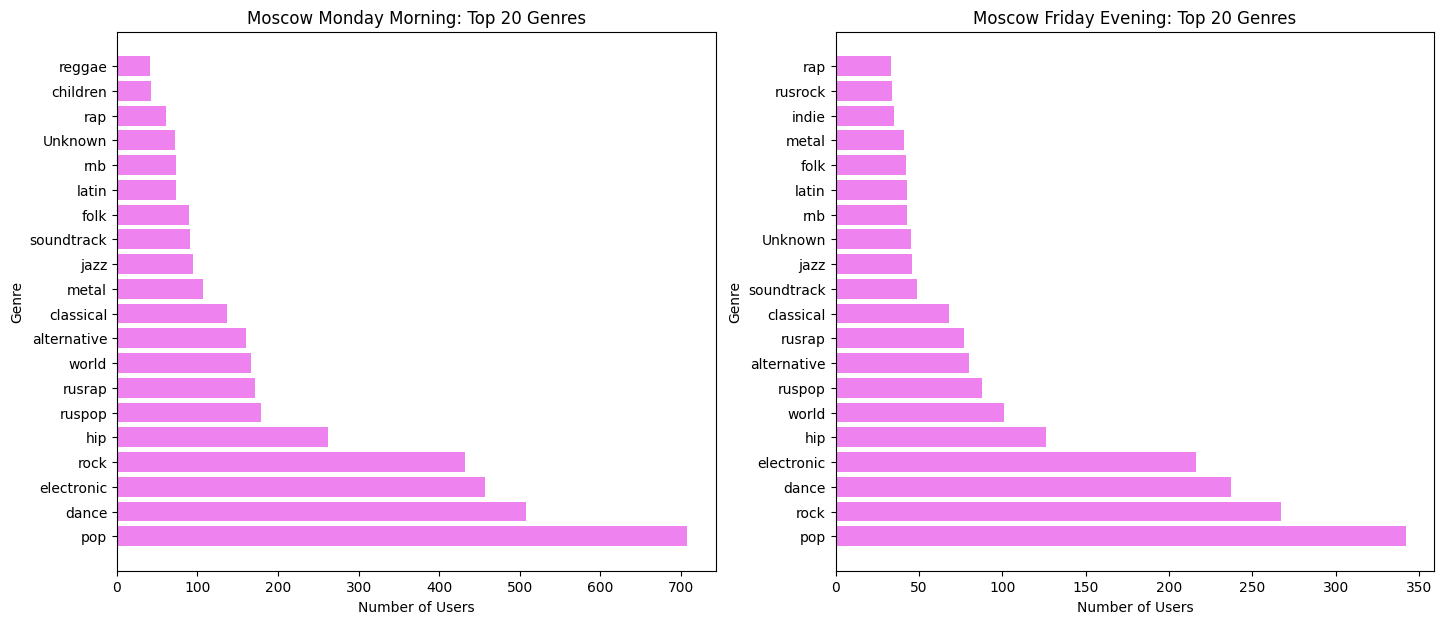

In [65]:
fig = plt.figure(figsize=(17, 7))
ax = fig.subplots(1, 2)
ax[0].barh(music_morning_moscow.head(20).index, music_morning_moscow.head(20).values, color= 'violet')
ax[0].set_title('Moscow Monday Morning: Top 20 Genres')
ax[0].set_xlabel('Number of Users')
ax[0].set_ylabel('Genre')
ax[1].barh(music_evening_moscow.head(20).index, music_evening_moscow.head(20).values, color= 'violet')
ax[1].set_title('Moscow Friday Evening: Top 20 Genres')
ax[1].set_xlabel('Number of Users')
ax[1].set_ylabel('Genre')
plt.show()


In [66]:
display(music_morning_peter.head(20))
display(music_evening_peter.head(20))

genre
pop            205
dance          161
rock           151
electronic     138
hip             75
ruspop          58
alternative     53
rusrap          53
world           36
classical       35
jazz            30
soundtrack      29
rap             27
metal           26
rnb             24
folk            24
indie           19
Unknown         18
latin           17
punk            16
Name: user, dtype: int64

genre
rock           116
pop            115
dance          102
electronic      86
hip             47
jazz            34
alternative     32
classical       31
world           26
ruspop          24
rusrap          21
folk            21
metal           18
latin           18
soundtrack      16
indie           16
rap             14
Unknown         14
children        10
rnb             10
Name: user, dtype: int64

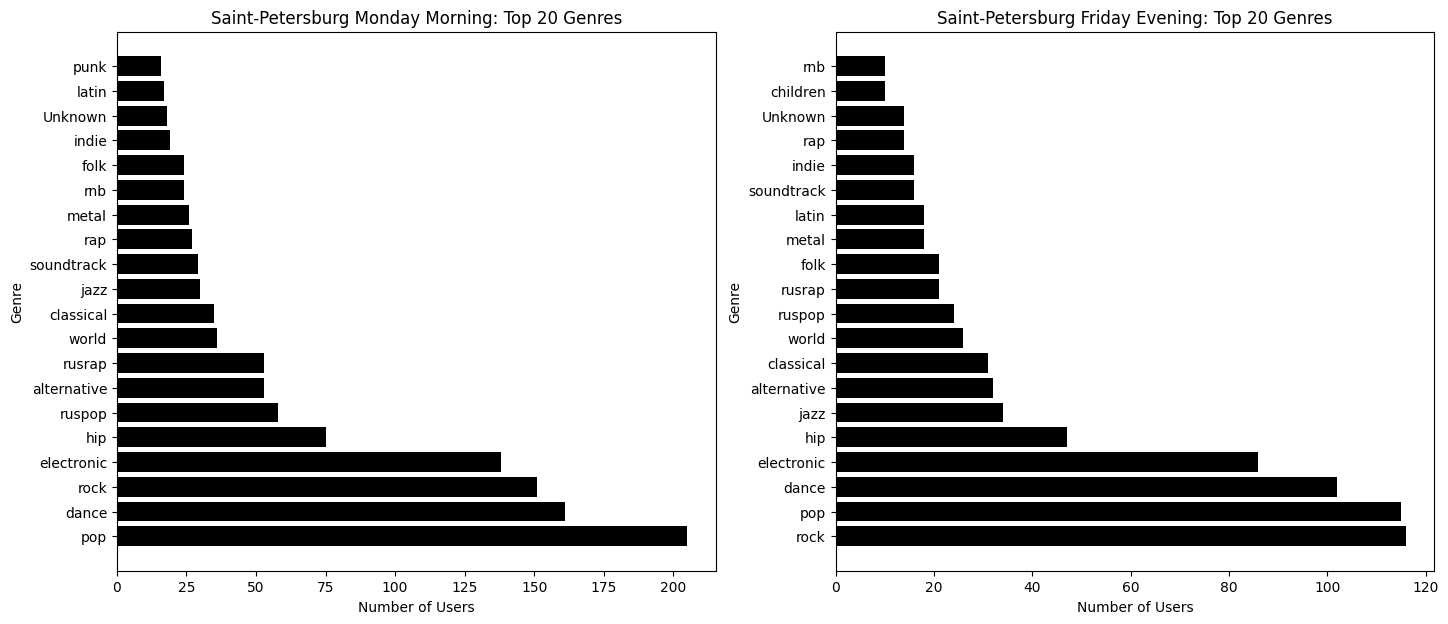

In [67]:
fig = plt.figure(figsize=(17, 7))
ax = fig.subplots(1, 2)
ax[0].barh(music_morning_peter.head(20).index, music_morning_peter.head(20).values, color= 'black')
ax[0].set_title('Saint-Petersburg Monday Morning: Top 20 Genres')
ax[0].set_xlabel('Number of Users')
ax[0].set_ylabel('Genre')
ax[1].barh(music_evening_peter.head(20).index, music_evening_peter.head(20).values, color= 'black')
ax[1].set_title('Saint-Petersburg Friday Evening: Top 20 Genres')
ax[1].set_xlabel('Number of Users')
ax[1].set_ylabel('Genre')
plt.show()


## Задание 3
# Выяснить какие жанры самые прослушиваемые и зависят ли они от города

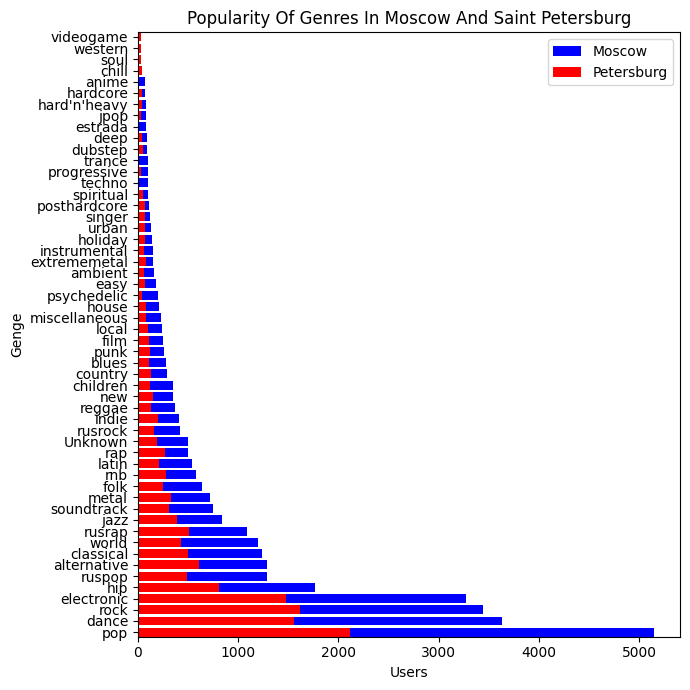

In [68]:
fig2 = plt.figure(figsize=(7, 7))
ax1 = fig2.add_subplot(111)

genre_counts_moscow = moscow_data.groupby('genre')['user'].nunique()
genre_counts_peter = peter_data.groupby('genre')['user'].nunique()

genre_counts_moscow = genre_counts_moscow.sort_values(ascending=False)
genre_counts_peter = genre_counts_peter.sort_values(ascending=False)

ax1.barh(genre_counts_moscow.head(50).index, genre_counts_moscow.head(50).values, label='Moscow', color='blue')

ax1.barh(genre_counts_peter.head(50).index, genre_counts_peter.head(50).values, label='Petersburg', color='red')
ax1.set_ylabel("Genge")
ax1.set_xlabel("Users")
ax1.set_title("Popularity Of Genres In Moscow And Saint Petersburg")
plt.margins(y=0)

ax1.legend()

plt.tight_layout()
plt.show()
